# **SIOC 221A - Analysis of Physical Oceanographic Data (A) - Problem 2** 

# Caique Dias Luko 






### We learned a lot more about probability density functions and sample means and variance this week. Here you’ll get a chance to put some of these concepts to work on real data.

### First, use your code from last week to load in the multi-year records from the Scripps pier. Make sure you’ve made it into a well-commented function and pushed it to the Githib repository. If you’re working with a group, it’s fine to push one file per group; just let me know which one you were part of. 

Let's start by creating a function to load a multi-year temperature and pressure pier records: 

In [1]:
def GetPierDataMY(path,year_start=None,year_end=None):
    # This function returns a multi-year temperature, pressure and time pier records 
    # (http://sccoos.org/thredds/catalog/autoss/catalog.html)
    
    # The path must be a directory containing all the pier data from 2005-2021
    # year_start is the start year of interest (must be between 2005 and 2021)
    # year_end is the end year of interest (must be between 2005 and 2021)
    # Default is year_start and year_start equal to None (all the 2005-2021 record will be loaded)
    # CDL SIO211A 10/08/2022

    # Important packages
    import netCDF4 as nc              # Read nc files
    import datetime                   # Manage time vectors
    import pandas as pd               # Useful to work with DataFrames and also to manage time
    from glob import glob             # To load a lot of files with same extension
    import numpy as np                # Using arrays
    
    # Getting path from all the files (2005-2021)
    files = glob(path+'scripps*.nc')
    files.sort()
    files=np.array(files)
    years = np.arange(2005,2022,1)
    if (year_start != None) and (year_end != None): # Selecting files from the chosen years
        files = files[(years>=year_start)&(years<=year_end)]
        
    # Loading loop for the selected files
    for f in range(len(files)):
        # Loading time
        dat = nc.Dataset(files[f])
        time = dat['time'][:]
    
        # Converting time vector
        timev = [str(datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(d))) for d in time]
        timev = pd.to_datetime(timev)
        # Loading temp and pressure
        temp = dat['temperature']
        pres = dat['pressure']
        
        # Concatenating data from different files
        if f==0:
                   TIMEV,TEMP,PRES=np.array(timev),np.array(temp),np.array(pres)
        else:
                   TIMEV = np.concatenate((TIMEV,np.array(timev)))
                   TEMP = np.concatenate((TEMP,np.array(temp)))
                   PRES = np.concatenate((PRES,np.array(pres)))
                
    return pd.DataFrame({'temp':TEMP,'pres':PRES,'time':TIMEV}) # Pier object


This function was added to GitHub

### Next, please look at some aspects of the data. Choose any two years to compare.
Let's load the record for 2015 and 2016:

In [2]:
import numpy as np
import pandas as pd

# Directory with all the pier data (2005-2021)
path = '/home/caique/Documentos/PhD_Courses/SIOC221A_DATA1/Homeworks/data/'

# Loading Pier record for 2018 and 2019
pier=GetPierDataMY(path,year_start=2018,year_end=2019)
temp,pres,timev=np.array(pier.temp),np.array(pier.pres),pd.to_datetime(np.array(pier.time))

### 1. Visual evaluation. For both temperature and pressure, plot the records from the two years. Are there obvious discrepancies between the two years? What years are covered? Any other observations?



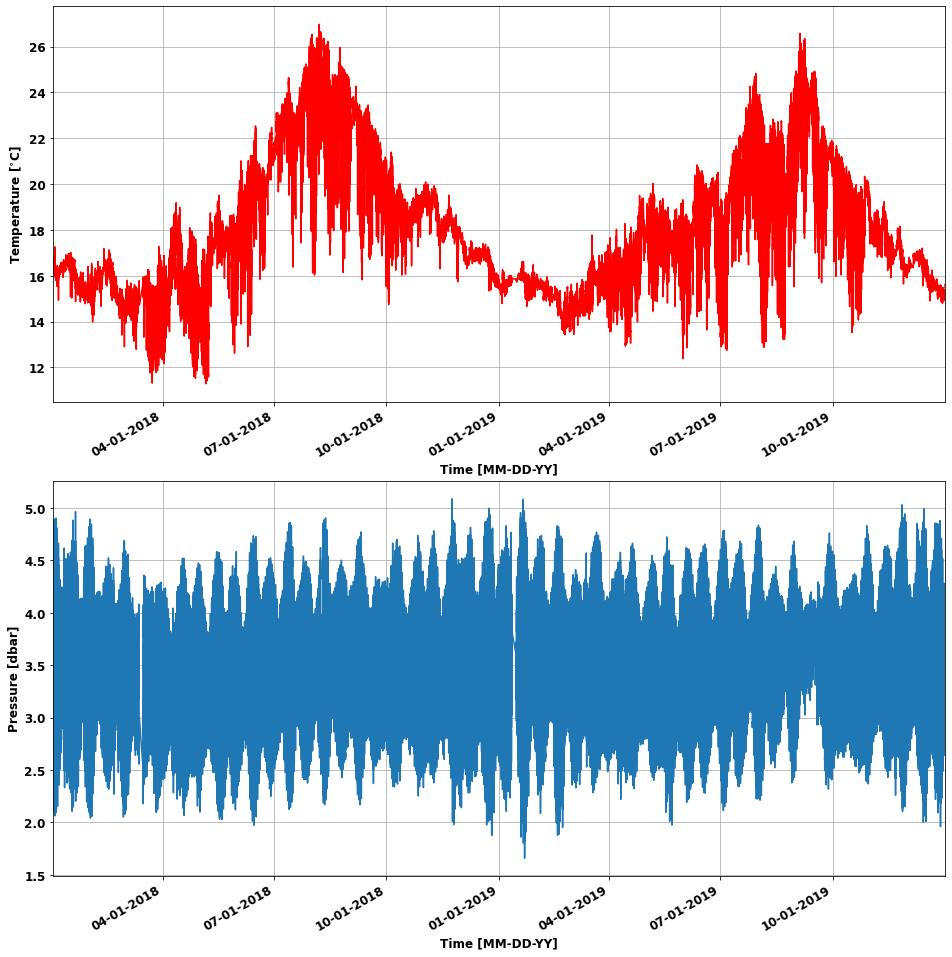

In [3]:
# Plotting packages
import matplotlib.pyplot as plt   # Plots
from matplotlib import rc         # Figure fonts
import matplotlib.dates as mdates # Manage dates on plots

#Creating plot
fig =plt.figure(figsize=(16,16))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(211)
plt.plot(timev,temp,color='red')
plt.xlim(timev[0],timev[-1])
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

ax = fig.add_subplot(212)
plt.plot(timev,pres)
plt.xlim(timev[0],timev[-1])
plt.xlabel('Time [MM-DD-YY]',fontsize=12,weight='bold')
plt.ylabel(u'Pressure [dbar]',fontsize=12,weight='bold')
# Setting datetick format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right') 
plt.grid()

plt.show()

The years 2018 and 2019 are covered. They look prettry similar, but there are some variations in the intraseasonal variability on the temperature record. During spring and early summer of 2018, for example, the temperature oscillated more than during the 2019 spring.

### 2. Means. For each quantity, evaluate whether the sample mean between the two years is consistent within error bars. Do you obtain different results if you subsample the data at (say) once per day?

In [4]:
# Creating function to compute the mean and standard error for temperature and pressure records from a particular year
def mean_stderror(temp,pres,timev,year):
    # Returns the mean and standard error for temperature and pressure records from a particular year
    # CDL 10/09/2022
    
    import numpy as np
    import datetime
    
    temp = temp[timev.year==year] # Slicing vector for the selected year
    pres = pres[timev.year==year] # Slicing vector for the selected year
    
    # Computing means
    tmean = np.nanmean(temp)
    pmean = np.nanmean(pres)

    # Computing standard deviations
    tstd = np.nanstd(temp)
    pstd = np.nanstd(pres)

    # N
    Nt = temp[~np.isnan(temp)].shape[0] # Size of temp matrix without NaNs 
    Np = pres[~np.isnan(pres)].shape[0] # Size of temp matrix without NaNs 

    # Computing standard error of the mean
    tstderr = tstd/(Nt**(1/2))
    pstderr = pstd/(Np**(1/2))

    return tmean,pmean,tstderr,pstderr

tmean18,pmean18,tstderr18,pstderr18 = mean_stderror(temp,pres,timev,2018)
tmean19,pmean19,tstderr19,pstderr19 = mean_stderror(temp,pres,timev,2019)

print('Temperature - 2018:')
print('Mean +- standard error: '+str(tmean18)+u' +- '+str(tstderr18)+'°C')
print('Lower limit: '+str(tmean18-tstderr18)+'°C')
print('Upper limit: '+str(tmean18+tstderr18)+'°C\n')

print('Temperature - 2019:')
print('Mean +- standard error: '+str(tmean19)+u' +- '+str(tstderr19)+'°C')
print('Lower limit: '+str(tmean19-tstderr19)+'°C')
print('Upper limit: '+str(tmean19+tstderr19)+'°C\n')

print('Pressure - 2018:')
print('Mean +- standard error: '+str(pmean18)+u' +- '+str(pstderr18)+' dbar')
print('Lower limit: '+str(pmean18-pstderr18)+' dbar')
print('Upper limit: '+str(pmean18+pstderr18)+' dbar\n')

print('Pressure - 2019:')
print('Mean +- standard error: '+str(pmean19)+u' +- '+str(pstderr19)+' dbar')
print('Lower limit: '+str(pmean19-pstderr19)+' dbar')
print('Upper limit: '+str(pmean19+pstderr19)+' dbar\n')


Temperature - 2018:
Mean +- standard error: 18.484737 +- 0.008559072775572387°C
Lower limit: 18.476178323464662°C
Upper limit: 18.493296469015807°C

Temperature - 2019:
Mean +- standard error: 17.922012 +- 0.0071723775135138085°C
Lower limit: 17.91483995158805°C
Upper limit: 17.929184706615075°C

Pressure - 2018:
Mean +- standard error: 3.4464104 +- 0.0013919063955498837 dbar
Lower limit: 3.4450185111612126 dbar
Upper limit: 3.447802323952313 dbar

Pressure - 2019:
Mean +- standard error: 3.5045424 +- 0.0013731968966914454 dbar
Lower limit: 3.5031691538723515 dbar
Upper limit: 3.5059155476657344 dbar



There is no overlap between the means and intervals of standard error for both temperature and pressure. As the standard error is of the order of 1x$10^{-3}$ for pressure and of 1x$10^{-2}$ for temperature, the intervals of mean $\pm$ standard error do not match.

### Do you obtain different results if you subsample the data at (say) once per day?

In [5]:
# Finding indexes to subsample temp and pres once per day 
dif = np.diff(timev.day)
idx = np.where(dif>0)

tmean18,pmean18,tstderr18,pstderr18 = mean_stderror(temp[idx],pres[idx],timev[idx],2018)
tmean19,pmean19,tstderr19,pstderr19 = mean_stderror(temp[idx],pres[idx],timev[idx],2019)

print('Temperature - 2018:')
print('Mean +- standard error: '+str(tmean18)+u' +- '+str(tstderr18)+'°C')
print('Lower limit: '+str(tmean18-tstderr18)+'°C')
print('Upper limit: '+str(tmean18+tstderr18)+'°C\n')

print('Temperature - 2019:')
print('Mean +- standard error: '+str(tmean19)+u' +- '+str(tstderr19)+'°C')
print('Lower limit: '+str(tmean19-tstderr19)+'°C')
print('Upper limit: '+str(tmean19+tstderr19)+'°C\n')

print('Pressure - 2018:')
print('Mean +- standard error: '+str(pmean18)+u' +- '+str(pstderr18)+' dbar')
print('Lower limit: '+str(pmean18-pstderr18)+' dbar')
print('Upper limit: '+str(pmean18+pstderr18)+' dbar\n')

print('Pressure - 2019:')
print('Mean +- standard error: '+str(pmean19)+u' +- '+str(pstderr19)+' dbar')
print('Lower limit: '+str(pmean19-pstderr19)+' dbar')
print('Upper limit: '+str(pmean19+pstderr19)+' dbar\n')


Temperature - 2018:
Mean +- standard error: 18.977812 +- 0.1660196461277573°C
Lower limit: 18.811792167226734°C
Upper limit: 19.14383145948225°C

Temperature - 2019:
Mean +- standard error: 18.486462 +- 0.14380723560178635°C
Lower limit: 18.34265440380251°C
Upper limit: 18.630268875006085°C

Pressure - 2018:
Mean +- standard error: 3.2987182 +- 0.026526714447898232 dbar
Lower limit: 3.272191499587136 dbar
Upper limit: 3.3252449284829324 dbar

Pressure - 2019:
Mean +- standard error: 3.3436098 +- 0.026451345646867866 dbar
Lower limit: 3.3171584642286205 dbar
Upper limit: 3.370061155522356 dbar



By sub-sampling, N decreases and, consequently, the standard error increases. For pressure, the mean is now consistent as the error bars are now overlapping. For temperature, that almost happened, but the standard error was still not big enough.

### 3. Variance. For each quantity, evaluate whether the variance from the two years are consistent. 

In [6]:
# Creating function to compute the variance and its standard error for temperature and pressure records from a particular year
def var_stderror(temp,pres,timev,year):
    # Returns the variance and its standard error for temperature and pressure records from a particular year
    # CDL 10/09/2022
    
    import numpy as np
    import datetime
    
    temp = temp[timev.year==year] # Slicing vector for the selected year
    pres = pres[timev.year==year] # Slicing vector for the selected year
    
    # Computing variances
    tvar = np.nanstd(temp)**2
    pvar = np.nanstd(pres)**2

    # N
    Nt = temp[~np.isnan(temp)].shape[0] # Size of temp matrix without NaNs 
    Np = pres[~np.isnan(pres)].shape[0] # Size of temp matrix without NaNs 

    # Computing standard error of the mean
    tstderr = tvar*(2/(Nt-1))**(1/2)
    pstderr = pvar*(2/(Np-1))**(1/2)

    return tvar,pvar,tstderr,pstderr

tvar18,pvar18,tstderr18,pstderr18 = var_stderror(temp,pres,timev,2018)
tvar19,pvar19,tstderr19,pstderr19 = var_stderror(temp,pres,timev,2019)

print('Temperature - 2018:')
print('Variance +- variance standard error: '+str(tvar18)+u' +- '+str(tstderr18)+'°C')
print('Lower limit: '+str(tvar18-tstderr18)+'°C')
print('Upper limit: '+str(tvar18+tstderr18)+'°C\n')

print('Temperature - 2019:')
print('Variance +- variance standard error: '+str(tvar19)+u' +- '+str(tstderr19)+'°C')
print('Lower limit: '+str(tvar19-tstderr19)+'°C')
print('Upper limit: '+str(tvar19+tstderr19)+'°C\n')

print('Pressure - 2018:')
print('Variance +- variance standard error: '+str(pvar18)+u' +- '+str(pstderr18)+' dbar')
print('Lower limit: '+str(pvar18-pstderr18)+' dbar')
print('Upper limit: '+str(pvar18+pstderr18)+' dbar\n')

print('Pressure - 2019:')
print('Variance +- variance standard error: '+str(pvar19)+u' +- '+str(pstderr19)+' dbar')
print('Lower limit: '+str(pvar19-pstderr19)+' dbar')
print('Upper limit: '+str(pvar19+pstderr19)+' dbar\n')


Temperature - 2018:
Variance +- variance standard error: 9.486362813604558 +- 0.037281489826660005°C
Lower limit: 9.449081323777898°C
Upper limit: 9.523644303431217°C

Temperature - 2019:
Variance +- variance standard error: 6.661199636938875 +- 0.026179180047222028°C
Lower limit: 6.635020456891652°C
Upper limit: 6.687378816986097°C

Pressure - 2018:
Variance +- variance standard error: 0.2508801802855629 +- 0.0009859613292054648 dbar
Lower limit: 0.24989421895635744 dbar
Upper limit: 0.2518661416147684 dbar

Pressure - 2019:
Variance +- variance standard error: 0.24416971465592852 +- 0.000959611371893047 dbar
Lower limit: 0.24321010328403547 dbar
Upper limit: 0.24512932602782156 dbar



The temperature and pressure variances are inconsistent as there is no overlap between the error bars. 

### Do you obtain different results if you subsample the data at (say) once per day?

In [7]:
# Recomputing with subsmapling (using the same indexing vector idx)
tvar18,pvar18,tstderr18,pstderr18 = var_stderror(temp[idx],pres[idx],timev[idx],2018)
tvar19,pvar19,tstderr19,pstderr19 = var_stderror(temp[idx],pres[idx],timev[idx],2019)

print('Temperature - 2018:')
print('Variance +- variance standard error: '+str(tvar18)+u' +- '+str(tstderr18)+'°C')
print('Lower limit: '+str(tvar18-tstderr18)+'°C')
print('Upper limit: '+str(tvar18+tstderr18)+'°C\n')

print('Temperature - 2019:')
print('Variance +- variance standard error: '+str(tvar19)+u' +- '+str(tstderr19)+'°C')
print('Lower limit: '+str(tvar19-tstderr19)+'°C')
print('Upper limit: '+str(tvar19+tstderr19)+'°C\n')

print('Pressure - 2018:')
print('Variance +- variance standard error: '+str(pvar18)+u' +- '+str(pstderr18)+'dbar')
print('Lower limit: '+str(pvar18-pstderr18)+'dbar')
print('Upper limit: '+str(pvar18+pstderr18)+' dbar\n')

print('Pressure - 2019:')
print('Variance +- variance standard error: '+str(pvar19)+u' +- '+str(pstderr19)+' dbar')
print('Lower limit: '+str(pvar19-pstderr19)+' dbar')
print('Upper limit: '+str(pvar19+pstderr19)+' dbar\n')

Temperature - 2018:
Variance +- variance standard error: 9.6744455380354 +- 0.7313193418880038°C
Lower limit: 8.943126196147396°C
Upper limit: 10.405764879923403°C

Temperature - 2019:
Variance +- variance standard error: 7.258862875011118 +- 0.5487184562399643°C
Lower limit: 6.710144418771154°C
Upper limit: 7.8075813312510824°C

Pressure - 2018:
Variance +- variance standard error: 0.2469869693695168 +- 0.01867045994357911dbar
Lower limit: 0.2283165094259377dbar
Upper limit: 0.26565742931309594 dbar

Pressure - 2019:
Variance +- variance standard error: 0.2455854639720565 +- 0.01856451609378498 dbar
Lower limit: 0.2270209478782715 dbar
Upper limit: 0.26414998006584145 dbar



By subsampling, the variance standard error increases and the pressure variances become consistent as there is some overlap between the error bars of 2018 and 2019. However, even though the temperature variance standar error has increased, the variances are still inconsistent.

### 4. Extreme values. For each of the two years, compute the likelihood given the observed PDF, and a Gaussian PDF with the observed variance, of a temperature extreme value 2σ greater than the mean.

In [8]:
# Using function from lecture to compute histogram

def compute_histogram(variable, bin_max, bin_min, dbin, pdf=False):
    
    """ Computes 1D histogram or probability density for a given variable.
        
    Keyword arguments:
    variable -- 1D array.
    bin_max -- maximum value for bins
    bin_min -- minimum value for bins
    dbin -- bin size
    pdf -- (default False)
    
    Returns:
    bins -- histogram bins
    counts -- either counts or probability density
        
    """
    bins = np.arange(bin_min, bin_max, dbin)
    count = []
    for i in range(len(bins)):
        ind = (variable>bins[i] - dbin/2) & (variable<=bins[i]+dbin/2)
        count.append(ind.sum())
    count = np.array(count)
    if pdf:
        norm_hist = count/count.sum()/dbin
        assert np.allclose(norm_hist.sum()*dbin, 1.0), "PDF doesn't sum to 1"
    
        return bins, norm_hist
    else:
        return bins, count   

# Creating a function to compute the likelihood of a valuer being higher than the mean + level*sigma
def likelihood(var,varmax,varmin,dbin,level,lower=False,upper=True):
    
    bins,pdf = compute_histogram(var,varmax,varmin,dbin,pdf=True)
    cdf = np.cumsum(pdf)
    varmean = np.nanmean(var)
    varstd = np.nanstd(var)
    cut = varmean+level*varstd
    return 1 - cdf[np.where(bins>=cut)[0][0]]
     
    
temp18=temp[timev.year==2018]
temp19=temp[timev.year==2019]

l18 = likelihood(temp18,30,9,1,2)
l19 = likelihood(temp19,30,9,1,2)

print(u'The likelihood of a extreme temperature value in 2018 being higher than the mean plus 2σ is equal to: '+str(round(l18*100,4))+'%\n')
print(u'The likelihood of a extreme temperature value in 2019 being higher than the mean plus 2σ is equal to: '+str(round(l19*100,4))+'%\n')


The likelihood of a extreme temperature value in 2018 being higher than the mean plus 2σ is equal to: 1.0448%

The likelihood of a extreme temperature value in 2019 being higher than the mean plus 2σ is equal to: 1.1376%



### 5. Probability density functions. For both pressure and temperature, plot the pdfs for the two years on the same axes. Overplot the Gaussian and uniform distributions that have the observed mean and variance.

Collaborated with Paige and Bingchen on this one. Also got some help from Jack Bauchop.

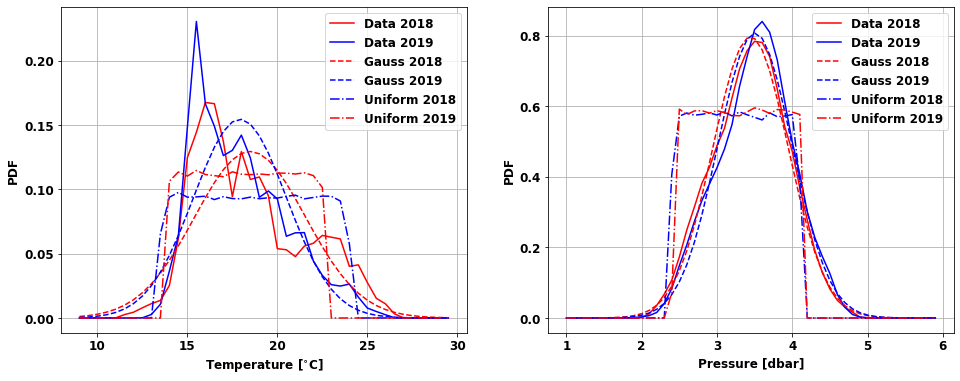

In [9]:
# Defining function to compute gaussian function
def gaus(var,bins):
    sig = np.nanstd(var)
    mu = np.nanmean(var)
    return (1.0/sig/np.sqrt(2*np.pi)) * (np.exp(-(bins-mu)**2 / (2*sig**2)))

tstd18 = np.nanstd(temp[timev.year==2018])
tstd19 = np.nanstd(temp[timev.year==2019])
pstd18 = np.nanstd(pres[timev.year==2018])
pstd19 = np.nanstd(pres[timev.year==2019])

# Data pdfs
binp18,pdfp18 = compute_histogram(pres[timev.year==2018],6,1,0.1,pdf=True)
binp19,pdfp19 = compute_histogram(pres[timev.year==2019],6,1,0.1,pdf=True)
bint18,pdft18 = compute_histogram(temp[timev.year==2018],30,9,0.5,pdf=True)
bint19,pdft19 = compute_histogram(temp[timev.year==2019],30,9,0.5,pdf=True)

# Gauss pdfs
gausp18 = gaus(pres[timev.year==2018],binp18)
gausp19 = gaus(pres[timev.year==2019],binp19)
gaust18 = gaus(temp[timev.year==2018],bint18)
gaust19 = gaus(temp[timev.year==2019],bint19)

# Uniform pdfs (upper and lower limits)
ap18 = pmean18 - np.sqrt(12)/2*(pstd18)
bp18 = pmean18 + np.sqrt(12)/2*(pstd18)
ap19 = pmean19 - np.sqrt(12)/2*(pstd19)
bp19 = pmean19 + np.sqrt(12)/2*(pstd19)

at18 = tmean18 - np.sqrt(12)/2*(tstd18)
bt18 = tmean18 + np.sqrt(12)/2*(tstd18)
at19 = tmean19 - np.sqrt(12)/2*(tstd19)
bt19 = tmean19 + np.sqrt(12)/2*(tstd19)

# Uniform pdfs (upper and lower limits)
unp18,bup18 = np.histogram(np.random.uniform(ap18,bp18,100000),bins=np.arange(1,6,0.1), density=True)
unp19,bup19 = np.histogram(np.random.uniform(ap19,bp19,100000),bins=np.arange(1,6,0.1), density=True)
unt18,but18 = np.histogram(np.random.uniform(at18,bt18,100000),bins=np.arange(9,30,0.5), density=True)
unt19,but19 = np.histogram(np.random.uniform(at19,bt19,100000),bins=np.arange(9,30,0.5), density=True)

#Creating plot
fig =plt.figure(figsize=(16,6))
rc('font',size=12)    
rc('font',weight='bold') 
rc('xtick',labelsize=12)  
rc('ytick',labelsize=12)

# Plot, limits and labels
ax = fig.add_subplot(121)
plt.plot(bint18,pdft18,color='red',label='Data 2018')
plt.plot(bint19,pdft19,color='blue',label='Data 2019')
plt.plot(bint18,gaust18,color='red',linestyle='--',label='Gauss 2018')
plt.plot(bint19,gaust19,color='blue',linestyle='--',label='Gauss 2019')
plt.plot(but18[:-1],unt18,color='blue',linestyle='-.',label='Uniform 2018')
plt.plot(but19[:-1],unt19,color='red',linestyle='-.',label='Uniform 2019')
plt.ylabel('PDF',fontsize=12,weight='bold')
plt.xlabel(u'Temperature [$^{\circ}$C]',fontsize=12,weight='bold')
plt.legend(loc='best')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(binp18,pdfp18,color='red',label='Data 2018')
plt.plot(binp19,pdfp19,color='blue',label='Data 2019')
plt.plot(binp18,gausp18,color='red',linestyle='--',label='Gauss 2018')
plt.plot(binp19,gausp19,color='blue',linestyle='--',label='Gauss 2019')
plt.plot(bup18[:-1],unp18,color='blue',linestyle='-.',label='Uniform 2018')
plt.plot(bup19[:-1],unp19,color='red',linestyle='-.',label='Uniform 2019')
plt.ylabel('PDF',fontsize=12,weight='bold')
plt.xlabel(u'Pressure [dbar]',fontsize=12,weight='bold')
plt.legend(loc='best')
plt.grid()

plt.show()

